## Date: October 30, 2022
## Name: Codie James
## Email: Codie.James1468@gmail.com

## Introduction 

In this notebook I apply machine learning techniques in order to distinguish key features that contribute to the success of a YouTube video.

### The Data
 he dataset used in my capstone project was taken from Kaggle. It was originally uploaded by the user Michael J. They employed webscraping to gather the data. The version that is being used throughout the notebook was updated a year after the initial upload, and is a cleaner version of the origial. I believe that it is a reliable source of information because it was webscraped directly from YouTube as a snapshot in time. 

### The Question
My business question that I will be targetting is: "What features of a video contribute to a video being popular". I decided to target this question because I can use likes, dislikes and comments to train a model.
 

Below I want to keep all of my imported packages in a single cell so that the notebook stays organized. If I need to problem solve then I know exactly where to go to check over my work.

In [1]:
# importing all of the libraries which I will be using throughout the notebook
#numpy for working with any kinds of aggregation
import numpy as np
#pandas to create dataframes and work with them
import pandas as pd
#matplotlib for plotting graphs
import matplotlib.pyplot as plt
#seaborn for plotting graphs that matplot lib may not
import seaborn as sns
# To split data into train and test splits
from sklearn.model_selection import train_test_split
# To scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
# To try dimensionality reduction
from sklearn.decomposition import PCA
# To build a simple model
from sklearn.linear_model import LogisticRegression
# To get the score of the models
from sklearn.metrics import accuracy_score
# To import the classifier for KNeighbors
from sklearn.neighbors import KNeighborsClassifier
# To do regression on KNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
# To "pickle" things, like accuracies or even an entire fitted model
import joblib
# To cross-validate
from sklearn.model_selection import cross_val_score
# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp
# To build a pipeline
from sklearn.pipeline import Pipeline
# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV
# To make a confusion matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

## Data Exploration and Cleaning
Next step will be importing my kaggle data into the notebook, I will be focusing my attention to the CA videos for this project to keep the dataset tidy and to limit the possibility of duplicate videos.My goal will be making a model that is robust and can be used in other workspaces.

In [2]:
# Reading in the csv data that was downloaded as a pandas dataframe
df = pd.read_csv('data/CAvideos.csv')

In [3]:
# checking to see what our dataframe looks like in terms of size
df.shape

(40881, 16)

My first step will be making sure the dataset is clean. I will explore the data and check for how many missing values I have if any are present in the dataset. I can check this by using pandas to find any null/na values.

In [4]:
# by checking the sum of na values I can see how many missing values I have and take the proper steps
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

While checking the null values I  also take this oppertunity to see what some of my column names are to  use the names as "keys" to search, filter or combine data later on. I will use the df.head function to get a tabular view of the data to better visualize what each row looks like.

In [5]:
# getting a snapshot of the dataframe and checking what each row looks like
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


After examining the data I want to  create a ratio that takes into account how interactive the viewers of the video are. I believe that I may be able to make a relation between this an the amount of views a video gets.

In [6]:
# creating the metric by combining counts and dividing it by total views
df['Interactivity Ratio'] = df['likes'] + df['dislikes'] + df['comment_count'] / df['views'] *100
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Interactivity Ratio
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,8.308457e+05
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1.294833e+05
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1.513743e+05
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1.342288e+05
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,1.655212e+06


Now I can incorporate it into my models in the future to see if it adds any value to the business question outlined above. If it has no significance it can be removed later, another metric I could add would be a like to dislike ratio. I want to see if there is a relation between a video with more likes recieving more views.

In [56]:
# Taking the amount of likes and dividing it by dislikes to get a ratio 
df['like_to_dislike'] = df['likes'] / df['dislikes']
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Interactivity Ratio,like_to_dislike,is_viral
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,8.308457e+05,18.135076,True
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1.294833e+05,75.707346,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1.513743e+05,27.352500,True
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1.342288e+05,66.485168,True
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,1.655212e+06,77.513044,True


I have made the like to dislike ratio in a way that if a video has more likes than dislikes the value will be positive and if a video has more dislikes than likes it will be a negative value. 

In [8]:
# creating my metric as being anything over 1 million views as being my threshold value
df['is_viral'] = df['views'] >=1000000 
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Interactivity Ratio,like_to_dislike,is_viral
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,8.308457e+05,18.135076,True
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1.294833e+05,75.707346,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1.513743e+05,27.352500,True
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1.342288e+05,66.485168,True
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,1.655212e+06,77.513044,True


I created a new column that I will be using as my target variable for my models going forward. I am going to define a videos success by the amount of views being equal to or greater than 1 million total views.

In [9]:
#checking to see if my data is unbalanced
df["is_viral"].value_counts()

False    30996
True      9885
Name: is_viral, dtype: int64

In [10]:
# viewing the data in a tabular format
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Interactivity Ratio,like_to_dislike,is_viral
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,8.308457e+05,18.135076,True
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1.294833e+05,75.707346,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1.513743e+05,27.352500,True
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1.342288e+05,66.485168,True
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,1.655212e+06,77.513044,True


I have decided that I will be breaking the data down into a smaller sample of 50% of the original size. I have chosen to do this as run-time is lower with less overall data being inputted into the model.

In [11]:
#using the frac aggregate in order to break the dataframe down into 50% of it original size
df_m = df.sample(frac=0.50)
df_m.shape

(20440, 19)

## Data Preprocessing
In this next step I am going to drop columns that I feel are not representative of my metric(s) for example the thumbnail link and video id are entirely random and generated at the time of publishing. These can not be used in any way to figure out a videos popularity. I have also chosen to remove the trending date and publishing time here where the potential to use timeseries could be employed to define other metrics for example: views per day but I will not be looking into this at this moment. Another possible branch off would be using NLP models and count vectorizers in order to see if the # of tags contributes to total views.

In [12]:
# dropping the selected columns
df_m.drop(['channel_title', 'title', 'trending_date', 'video_id', 'tags', 'publish_time', 'thumbnail_link', 'description'],axis=1, inplace=True)

Changing the data that is left over to numerical data is important before I can do any kind of modelling. I am not employing any kind of NLP based models here, I should have only the numerical columns left in my dataframe as I have removed the categorical columns for this purpose.

In [13]:
#checking the data types of the remaining columns
df_m.dtypes

category_id                 int64
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
Interactivity Ratio       float64
like_to_dislike           float64
is_viral                     bool
dtype: object

Important note is that the bool data types are represented as 1 or 0.TRUE is represented as a 1 and anything with FALSE is represented as 0, I will however have to sort if there are any inf values and will do so in the next step.

In [14]:
#replacing the inf values as a nan as I know there are no nan values in my data
df_m.replace([np.inf, -np.inf], np.nan, inplace=True)
# dropping the new nan values and using inplace in order to have the data updated
df_m.dropna(inplace=True)

## Modelling and evaluations

In this part I will be going over the modelling proccess, evaluating the models and some hyper parameter optimization. I will be starting with a logistic regression first unscaled to get a baseline and then I will move into trying 3 different scaling methods: Standard scaler, min-max and robust scaler. I will be verifying model accuracy between the train and test set as to not overfit or underfit my models.

In [15]:
# assigning the variables
X = df_m.drop(columns='is_viral')
y = df_m['is_viral']

#splitting my train and test sets with a size of 20% as I believe this is a good start
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

logreg = LogisticRegression( solver ='lbfgs')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)
# fit model and score
logreg.fit(X_train, y_train)
print(f"Train accuracy: {logreg.score(X_train, y_train)}")
print(f"Test accuracy: {logreg.score(X_test, y_test)}")

Train accuracy: 0.9250061774153694
Test accuracy: 0.9261363636363636


I have chosen to split the test size into 20% of the data and use the other 80% to train the data with a random state of 1 so that the results can be replicated over multiple times to keep the next steps comparable as I adjust the models.

In [16]:
#scaling the data
scaler = StandardScaler()
#refitting with the scaled data
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)
# fit model on scaled data
logit = logreg.fit(X_train_ss, y_train)
# train accuracy
logit_ss_train_acc = logit.score(X_train_ss, y_train)
# test accuracy
logit_ss_test_acc = logit.score(X_test_ss, y_test)

print("---Standard Scaler data---")
print(f"Training accuracy: {logit_ss_train_acc}")
print(f"TEST accuracy: {logit_ss_test_acc}")

---Standard Scaler data---
Training accuracy: 0.9901161354089449
TEST accuracy: 0.9903656126482213


After scaling the data we can see that our accuracy has improved from getting ~92% to being closer to ~99%.The difference between our train and test set is <0.5% indicates that the model is not overfitting. Next I will be using a min-max scaler which will give each value a new value between 0 and 1.

In [17]:
#scaling the data
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)
# transform both the X_train and X_test data with the fitted scaler
X_train_mm = mmscaler.transform(X_train)
X_test_mm = mmscaler.transform(X_test)

# fit model on scaled data
logit = logreg.fit(X_train_mm, y_train)
# train accuracy
logit_mm_train_acc = logit.score(X_train_mm, y_train)
# test accuracy
logit_mm_test_acc = logit.score(X_test_mm, y_test)

print("---MinMax Scaler data---")
print(f"Training accuracy: {logit_mm_train_acc}")
print(f"TEST accuracy: {logit_mm_test_acc}")

---MinMax Scaler data---
Training accuracy: 0.8382134914751668
TEST accuracy: 0.8344861660079052


After trying to same test again with a min-max scaler we can see that our accuracy has actually decreased. A min-max scaler would not be correct in this instance as it is not appropriate to fit this kind of scaling on this model. Next i'll use a robust scaler which gets rid of the median and scales the data to a quantile range for example 1st quantile would be 25%.

In [18]:
# instantiate the scaler
rscaler = RobustScaler()
# fit the scaler to the X_train data
rscaler.fit(X_train)
# transform both the X_train and X_test data with the fitted scaler
X_train_r = rscaler.transform(X_train)
X_test_r = rscaler.transform(X_test)
# fit model on scaled data
logit = logreg.fit(X_train_r, y_train)
# train accuracy
logit_r_train_acc = logit.score(X_train_r, y_train)
# test accuracy
logit_r_test_acc = logit.score(X_test_r, y_test)

print("---Robust Scaler data---")
print(f"Training accuracy: {logit_r_train_acc}")
print(f"TEST accuracy: {logit_r_test_acc}")

---Robust Scaler data---
Training accuracy: 0.9982085495428713
TEST accuracy: 0.9975296442687747


Now we can see that our train and test set have almost identical accuracy not seeing a difference until the 7th decimal place meaning that this scaling with our model fits the data very well. I will be using this as my model of best fit moving forward. Next I will try other types of machine learning and I will employ a K-Nearest Neighbours algorithm followed by a Decision Tree classifier.

In [19]:
#instantiate the model with a number of neighbours set as 30
KNN_model = KNeighborsClassifier(n_neighbors=15)
#fit the model
KNN_model.fit(X_train_r, y_train)

# Score the model on the test set
#robust scaler
r_test_predictions = KNN_model.predict(X_test_r)
r_test_accuracy = accuracy_score(r_test_predictions, y_test)
print(f"Test set accuracy for robust scaler: {r_test_accuracy}")
#min max scaler
mm_test_predictions = KNN_model.predict(X_test_mm)
mm_test_accuracy = accuracy_score(mm_test_predictions, y_test)
print(f"Test set accuracy for min/max scaler: {mm_test_accuracy}")
#standard scaler
ss_test_predictions = KNN_model.predict(X_test_ss)
ss_test_accuracy = accuracy_score(ss_test_predictions, y_test)
print(f"Test set accuracy for standard scaler: {ss_test_accuracy}")

Test set accuracy for robust scaler: 0.9696146245059288
Test set accuracy for min/max scaler: 0.7524703557312253
Test set accuracy for standard scaler: 0.8060770750988142


After employing our K-Nearest Neighbours a robust scaler has the best result. When using this model I have input a generic value for the number of neighbors which in this case will be taking a single point and measuring it against the nearest 15 data points. I will now do some hyper parameter optimization and find the best value to use in order to get a model of best fit for this type of learning.

In [20]:
# Loop over different number of neighbors
### SCALING
train_accs_s = []
test_accs_s = []

for k in range(5,150):
    
    # Instantiate & fit
    my_knn = KNeighborsClassifier(n_neighbors = k)
    my_knn.fit(X_train_r, y_train)
    
    # Evaluate on train & test data
    train_accs_s.append( my_knn.score(X_train_r, y_train) )
    test_accs_s.append( my_knn.score(X_test_r, y_test) )

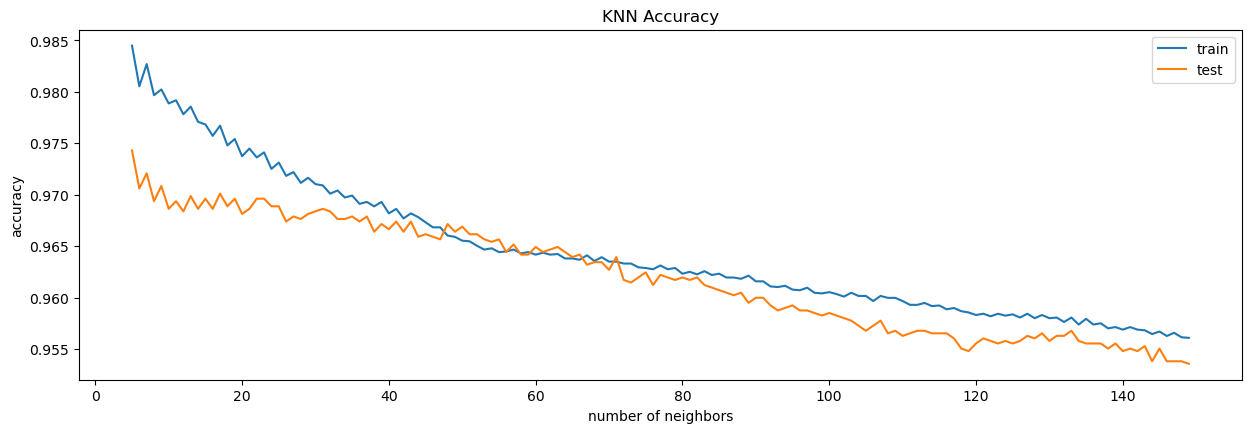

In [21]:
# plotting out our results using matplotlib
plt.figure(figsize=(15, 10))
plt.subplot(212) # plot scaled classifier results
plt.plot(range(5,150), train_accs_s, label='train')
plt.plot(range(5,150), test_accs_s, label='test')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('KNN Accuracy')
plt.show()

After plotting out our information of looping through each amount of neighbors the best hyper parameter number of neighbors is 50. This is because the difference between the train and test accuracy is at a point where it is closest together.

In [38]:
#instantiate the model with a number of neighbours set as 30
KNN_model = KNeighborsClassifier(n_neighbors=50)
#fit the model
KNN_model.fit(X_train_r, y_train)

# Score the model on the test set
#robust scaler
r_test_predictions = KNN_model.predict(X_test_r)
r_test_accuracy = accuracy_score(r_test_predictions, y_test)
print(f"Test set accuracy for robust scaler: {r_test_accuracy}")
#min max scaler
mm_test_predictions = KNN_model.predict(X_test_mm)
mm_test_accuracy = accuracy_score(mm_test_predictions, y_test)
print(f"Test set accuracy for min/max scaler: {mm_test_accuracy}")
#standard scaler
ss_test_predictions = KNN_model.predict(X_test_ss)
ss_test_accuracy = accuracy_score(ss_test_predictions, y_test)
print(f"Test set accuracy for standard scaler: {ss_test_accuracy}")

Test set accuracy for robust scaler: 0.966897233201581
Test set accuracy for min/max scaler: 0.7524703557312253
Test set accuracy for standard scaler: 0.8031126482213439


Even though our accuracy in the test set has dropped our model overall is much more robust for use on new data that it hasnt seen before. Next step I will be training a decision tree classifier on the data set to see what kind of results I can get returned to me using another algorithm.

In [23]:
#Fit to the training data
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
#scoring the model
print(f"The train classification accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"The test classification accuracy is:  {DT_model.score(X_test,y_test)}")

The train classification accuracy is:  1.0
The test classification accuracy is:  0.9997529644268774


Initially running the model results in the model is overfitting to the data. Decision trees are easy to overfit if you do not properly tune them. This has happened because I havent set a max_depth in the instantiaton of the model and I will now loop through the depths to optimize my hyper parameters.

In [24]:
# Decision Tree accuracy testing

train_accs_s = []
test_accs_s = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d)
    my_dt.fit(X_train, y_train)
    
    # Evaluate on train & test data
    train_accs_s.append( my_dt.score(X_train, y_train) )
    test_accs_s.append( my_dt.score(X_test, y_test) )

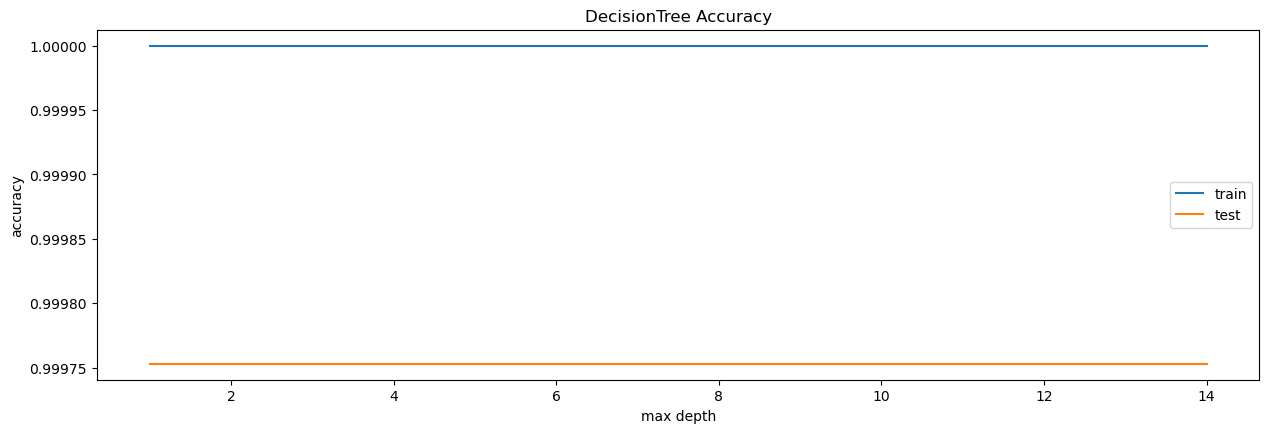

In [25]:
#plotting the results
plt.figure(figsize=(15, 10))
plt.subplot(212) # plot scaled classifier results
plt.plot(depth_values, train_accs_s, label='train')
plt.plot(depth_values, test_accs_s, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

After checking our best depth we can see that the model is over-fitting even with a max depth of 1 so now that I know its not a depth issue thats causing my model to over fit I will have to take a deeper look into correlations and feature importance as the model may have found a specific feature(s) that is contributing and abnormal amount to solving the problem statement.

In [43]:
#checking the correlation values in a tabular format
df_m.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Interactivity Ratio,like_to_dislike,is_viral
category_id,1.000000,-0.142713,-0.147482,-0.029924,-0.068814,0.041730,NaN,-0.016966,-0.141121,-0.038680,-0.154972
views,-0.142713,1.000000,0.847144,0.560984,0.696973,-0.010600,NaN,0.001497,0.862533,-0.049931,0.431641
likes,-0.147482,0.847144,1.000000,0.474178,0.825659,-0.022589,NaN,0.002439,0.993073,0.044123,0.388941
dislikes,-0.029924,0.560984,0.474178,1.000000,0.665980,-0.006917,NaN,0.000661,0.574339,-0.045411,0.149676
comment_count,-0.068814,0.696973,0.825659,0.665980,1.000000,-0.026917,NaN,0.003349,0.856570,0.006481,0.272505
comments_disabled,0.041730,-0.010600,-0.022589,-0.006917,-0.026917,1.000000,NaN,-0.002752,-0.021926,-0.049928,-0.003215
ratings_disabled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_error_or_removed,-0.016966,0.001497,0.002439,0.000661,0.003349,-0.002752,NaN,1.000000,0.002356,-0.007780,0.000137
Interactivity Ratio,-0.141121,0.862533,0.993073,0.574339,0.856570,-0.021926,NaN,0.002356,1.000000,0.034966,0.381609
like_to_dislike,-0.038680,-0.049931,0.044123,-0.045411,0.006481,-0.049928,NaN,-0.007780,0.034966,1.000000,-0.060722


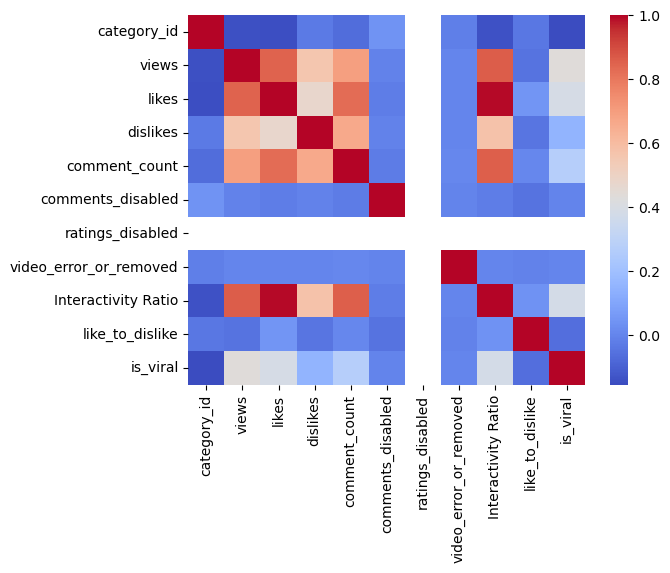

In [44]:
#plotting the correlations in a heatmap using seaborn to get a more visual representation
sns.heatmap(df_m.corr(), cmap='coolwarm')
plt.show()

Checking the correlations visually to more easily pick out which columns are highly correlated shows that interactivity ratio is mostly correlated with likes however I believe that I should keep it included as I feel like it gives the model another set of information even if it is very similar to likes. I will also check the confusion matrix for the logistic regression as I am now evaluating the models more closely.

In [60]:
# Get class predictions
y_pred = logit.predict(X_test_r)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Positive", "Predicted Negative"],
    index=["True Positive", "True Negative"]
)

display(cf_df)

,Predicted Positive,Predicted Negative
True Positive,2002,1044
True Negative,35,967


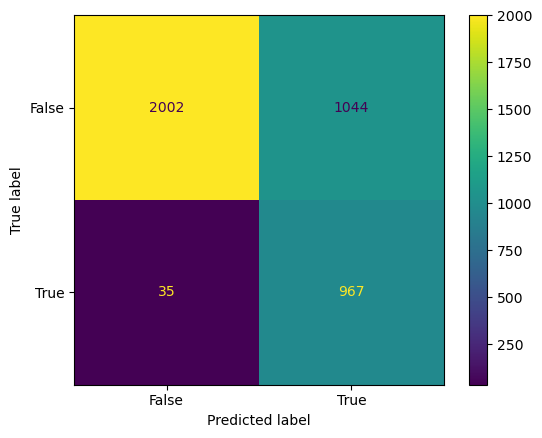

In [61]:
# plotting out the confusion matrix
plot_confusion_matrix(logit, X_test_r, y_test);

By viewing the confusion matrix it shows important information about which values the model predicts correctly. Our True Negatives as 3045 and True Positives as 993. The False Negatives and positives represent the predictions it got incorrect.

<AxesSubplot: >

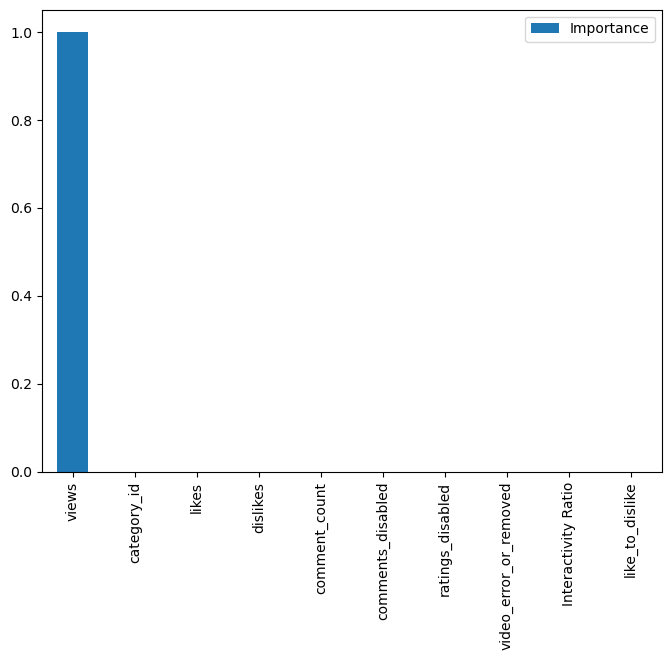

In [30]:
# finding the feature importance and then plotting it out to have a visual representation of the features
feat_importances = pd.DataFrame(DT_model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

With a clear indication of why the decision trees are over-fitting I can remove the views column from the model. The classifier has recognized that by looking at views it can determine which videos are over 1 million. Since the target variable is 1 million it is leaking the data into the training model.

In [31]:
X1 = df_m.drop(columns=['is_viral','views'])
y1 = df_m['is_viral']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, stratify=y1, random_state=1)

DT_model.fit(X1_train, y1_train)
#scoring the model
print(f"The train classification accuracy is:  {DT_model.score(X1_train,y1_train)}")
print(f"The test classification accuracy is:  {DT_model.score(X1_test,y1_test)}")

The train classification accuracy is:  1.0
The test classification accuracy is:  0.8698122529644269


Now I will do the same as for decision trees as I did with the hyper parameter optimization to find the model of best fit for the decisions trees.

In [32]:
# Decision Tree accuracy testing

train_accs_s = []
test_accs_s = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d)
    my_dt.fit(X1_train, y1_train)
    
    # Evaluate on train & test data
    train_accs_s.append( my_dt.score(X1_train, y1_train) )
    test_accs_s.append( my_dt.score(X1_test, y1_test) )

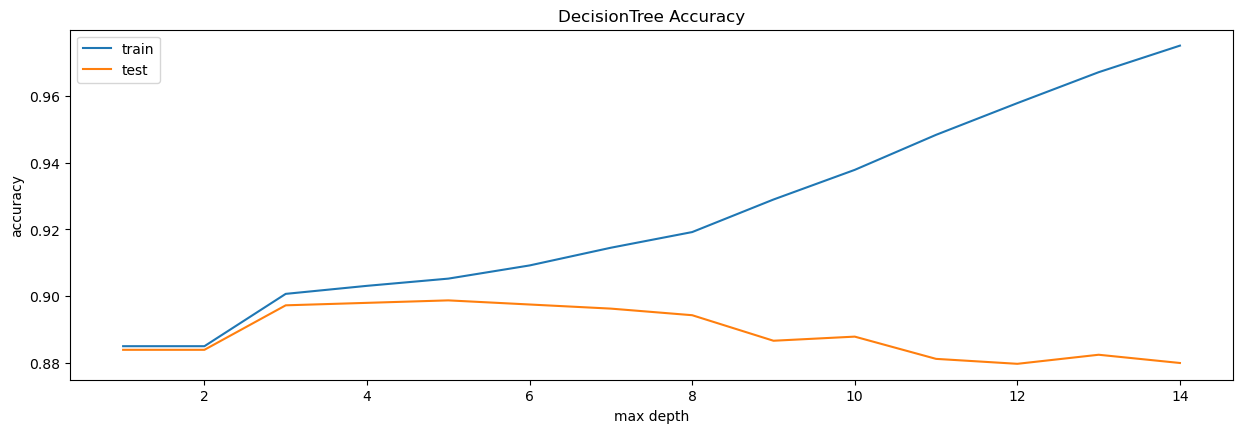

In [33]:
#plotting the results
plt.figure(figsize=(15, 10))
plt.subplot(212) # plot scaled classifier results
plt.plot(depth_values, train_accs_s, label='train')
plt.plot(depth_values, test_accs_s, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

After checking the different values of the max depths I believe that the best option for a decision tree max depth would be a depth of 5 so now I will employ that hyper parameter and see what kind of result I get back in return.

In [34]:
#Fit to the training data
DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(X1_train, y1_train)
#scoring the model
print(f"The train classification accuracy is:  {DT_model.score(X1_train,y1_train)}")
print(f"The test classification accuracy is:  {DT_model.score(X1_test,y1_test)}")

The train classification accuracy is:  0.9052384482332592
The test classification accuracy is:  0.8987154150197628


Since there is a data leakage problem I will remove the views from my original models and rerun the test to see how much the accuracy is affected.

In [46]:
# assigning the variables
T = df_m.drop(columns=['is_viral', 'views'])
b = df_m['is_viral']

#splitting my train and test sets with a size of 20% as I believe this is a good start
T_train, T_test, b_train, b_test = train_test_split(T, b, test_size=0.20, stratify=y, random_state=1)

logreg = LogisticRegression( solver ='lbfgs')

T_train, T_test, b_train, b_test = train_test_split(T, b, test_size=0.20, stratify=y, random_state=1)
# fit model and score
logreg.fit(T_train, b_train)
print(f"Train accuracy: {logreg.score(T_train, b_train)}")
print(f"Test accuracy: {logreg.score(T_test, b_test)}")

Train accuracy: 0.9147516679021498
Test accuracy: 0.9137845849802372


In [49]:

rscaler.fit(T_train)
# transform both the X_train and X_test data with the fitted scaler
T_train_r = rscaler.transform(T_train)
T_test_r = rscaler.transform(T_test)
# fit model on scaled data
logit = logreg.fit(T_train_r, b_train)
# train accuracy
logit_r_train_acc1 = logit.score(T_train_r, b_train)
# test accuracy
logit_r_test_acc1 = logit.score(T_test_r, b_test)

print("---Robust Scaler data---")
print(f"Training accuracy: {logit_r_train_acc1}")
print(f"TEST accuracy: {logit_r_test_acc1}")

---Robust Scaler data---
Training accuracy: 0.8962811959476156
TEST accuracy: 0.8962450592885376


In [51]:
T_train_ss = scaler.fit_transform(T_train)
T_test_ss = scaler.transform(T_test)
# fit model on scaled data
logit = logreg.fit(T_train_ss, b_train)
# train accuracy
logit_ss_train_acc1 = logit.score(T_train_ss, b_train)
# test accuracy
logit_ss_test_acc1 = logit.score(T_test_ss, b_test)

print("---Standard Scaler data---")
print(f"Training accuracy: {logit_ss_train_acc1}")
print(f"TEST accuracy: {logit_ss_test_acc1}")

---Standard Scaler data---
Training accuracy: 0.8960958734865332
TEST accuracy: 0.8945158102766798


In [53]:
#scaling the data
mmscaler = MinMaxScaler()
mmscaler.fit(T_train)
# transform both the X_train and X_test data with the fitted scaler
T_train_mm = mmscaler.transform(T_train)
T_test_mm = mmscaler.transform(T_test)

# fit model on scaled data
logit = logreg.fit(T_train_mm, b_train)
# train accuracy
logit_mm_train_acc1 = logit.score(T_train_mm, b_train)
# test accuracy
logit_mm_test_acc1 = logit.score(T_test_mm, b_test)

print("---MinMax Scaler data---")
print(f"Training accuracy: {logit_mm_train_acc1}")
print(f"TEST accuracy: {logit_mm_test_acc1}")

---MinMax Scaler data---
Training accuracy: 0.8223375339757846
TEST accuracy: 0.821393280632411


In [54]:
#instantiate the model with a number of neighbours set as 30
KNN_model = KNeighborsClassifier(n_neighbors=50)
#fit the model
KNN_model.fit(T_train_r, b_train)

# Score the model on the test set
#robust scaler
r_test_predictions1 = KNN_model.predict(T_test_r)
r_test_accuracy1 = accuracy_score(r_test_predictions1, y_test)
print(f"Test set accuracy for robust scaler: {r_test_accuracy1}")
#min max scaler
mm_test_predictions1 = KNN_model.predict(T_test_mm)
mm_test_accuracy1 = accuracy_score(mm_test_predictions1, b_test)
print(f"Test set accuracy for min/max scaler: {mm_test_accuracy}")
#standard scaler
ss_test_predictions1 = KNN_model.predict(T_test_ss)
ss_test_accuracy1 = accuracy_score(ss_test_predictions1, b_test)
print(f"Test set accuracy for standard scaler: {ss_test_accuracy1}")

Test set accuracy for robust scaler: 0.907608695652174
Test set accuracy for min/max scaler: 0.7524703557312253
Test set accuracy for standard scaler: 0.7912549407114624


Now that I have re-run the models that I had made previously I can confirm that I had data leaking into my dataset and that the best model in order to find the answer that I was looking for is actually an unscalled logistic regression with a train accuracy of ~91% and a comparable ~91% test accuracy

<AxesSubplot: >

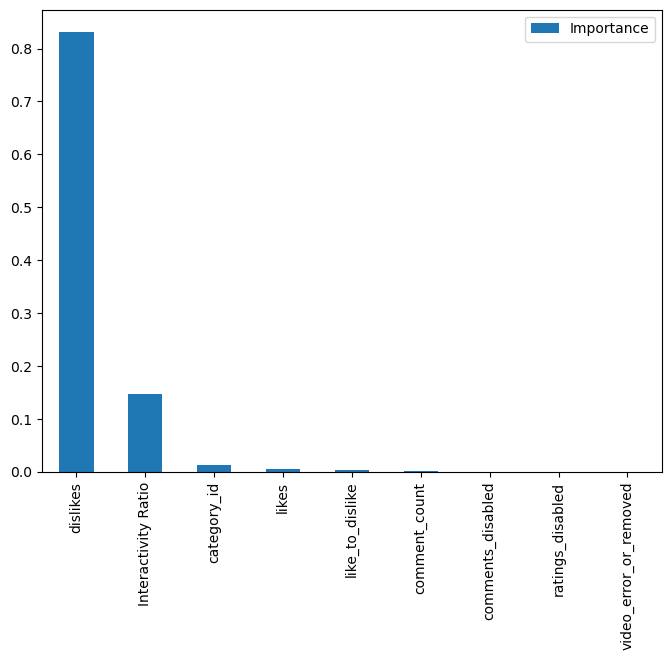

In [57]:
# finding the feature importance and then plotting it out to have a visual representation of the features
feat_importances = pd.DataFrame(DT_model.feature_importances_, index=X1_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

Now the graph shows that the most important feature would be the amount of dislikes. This means that having lots of dislikes or very low dislikes is likely to give that particular video lots of views.

## Conclusion

After running machine learning methods there is important information in the dataset that can lead to the success of a YouTube video. By determining a videos user activity the model is able to guess with >90% accuracy in most cases if a video will be above 1 million views. I believe that the model would be more robust if the data had features like:

Subsribers,
Channel views,
Number of videos.


In conclusion the most important feature for this dataset in determining the success of a video is dislikes. Using just the information in the data category_id was also very important and next steps would be looking at which categories have the highest views.